In [54]:
import sys
import os
import numpy as np

root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(root_dir)

import torch
import matplotlib.pyplot as plt
from vae_cnn import VAECNN

In [55]:
def load_model_and_sample(model_path, input_shape, encoder_channels, latent_dim, num_samples=5):
    checkpoint = torch.load(model_path)
    
    model = VAECNN(input_shape, latent_dim, encoder_channels)
    
    # Load saved weights
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()
    
    # Generate random samples from the latent space
    with torch.no_grad():
        # Create a random tensor in the latent space
        z = torch.randn(num_samples, latent_dim)
        samples = model.decode(z)\

    return samples


def visualize_samples(samples):
    _, axes = plt.subplots(1, len(samples), figsize=(15, 3))
    for i, sample in enumerate(samples):
        # Move the tensor to CPU and convert to numpy
        img = sample.cpu().permute(1, 2, 0).numpy()
        
        # Clip values to [0, 1] range (same as utils.py)
        img = np.clip(img, 0, 1)
        
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f"Sample {i+1}")
    
    plt.tight_layout()
    plt.show()

/var/folders/pb/8f20t07j4z97xmfstz3mvp2r0000gn/T/ipykernel_29446/527727523.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path)


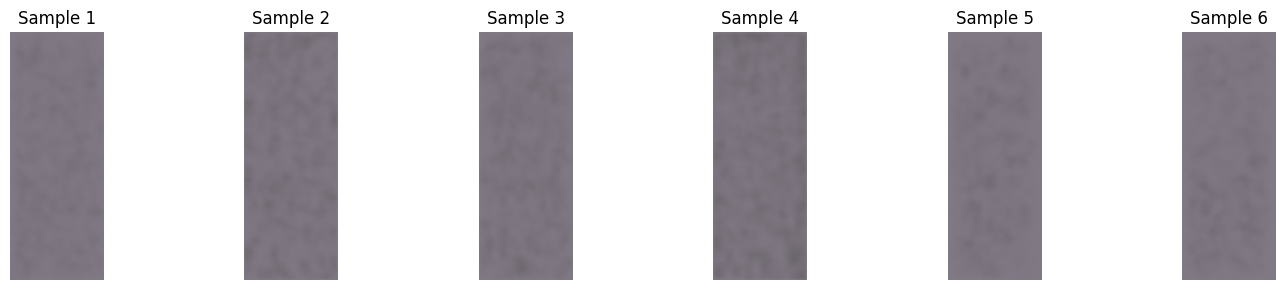

In [56]:
project_root = os.path.dirname(os.getcwd())
sys.path.append(project_root)


model_filename = 'vae_cnn_20240903_152952_ld32_ec4-8-16-32_bs2_lr3.0e-04.pth'
model_path = os.path.join(project_root, 'models', model_filename)

# Define input shape and latent dimension
input_shape = (3, 572, 217)
encoder_channels = [4, 8, 16, 32] # Match this with ecX-X-X-X in model_filename
latent_dim = 32 # Match this with ldXX in model_filename

samples = load_model_and_sample(model_path, input_shape, encoder_channels, latent_dim, num_samples=6)

# Visualize samples
visualize_samples(samples)